In [6]:
import dask
import dask.dataframe as dd

print("Dask version:", dask.__version__)


Dask version: 2024.8.2


Dashboard: http://192.168.1.42:8787/status
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')


2025-06-27 13:29:22,884 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle bb6c54c737d949abfdc3a8d95800b021 initialized by task ('shuffle-transfer-bb6c54c737d949abfdc3a8d95800b021', 0) executed on worker inproc://192.168.1.42/4212/4
2025-06-27 13:29:22,988 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle bb6c54c737d949abfdc3a8d95800b021 deactivated due to stimulus 'task-finished-1751011162.9886394'



Top Pickup Zones:
 Zone
Allerton/Pelham Gardens    1
Alphabet City              1
Arden Heights              1
Arrochar/Fort Wadsworth    1
Astoria                    1
Astoria Park               1
Auburndale                 1
Baisley Park               1
Bath Beach                 1
Battery Park               1
Name: count, dtype: int64[pyarrow]


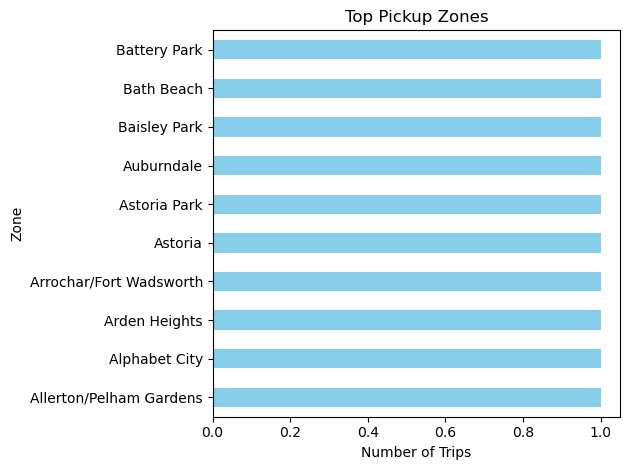

In [9]:
import os, shutil, logging
from dask.distributed import Client
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Silence noisy disk logs
logging.getLogger("distributed.diskutils").setLevel(logging.CRITICAL)
logging.getLogger("distributed.node").setLevel(logging.CRITICAL)
logging.getLogger("distributed.scheduler").setLevel(logging.WARNING)

# Safe cleanup of scratch dir
scratch_dir = "C:/Temp/dask"
if os.path.exists(scratch_dir):
    try:
        for root, dirs, files in os.walk(scratch_dir, topdown=False):
            for name in files:
                try:
                    os.remove(os.path.join(root, name))
                except PermissionError:
                    pass
            for name in dirs:
                try:
                    os.rmdir(os.path.join(root, name))
                except OSError:
                    pass
        shutil.rmtree(scratch_dir, ignore_errors=True)
    except Exception as e:
        print("Scratch cleanup skipped:", e)

os.makedirs(scratch_dir, exist_ok=True)

# Close previous client (if any) and launch fresh one
try:
    client.close()
except:
    pass

client = Client(local_directory=scratch_dir, processes=False)
print("Dashboard:", client.dashboard_link)


# Load the zone lookup data
df = dd.read_csv("D:/taxi+_zone_lookup.csv")  # Make sure this path is correct!

# Peek at structure
print(df.head())
print(df.columns)

# Analyze most common zones
if 'Zone' in df.columns:
    pickup_counts = df['Zone'].value_counts().compute()
    print("\nTop Pickup Zones:\n", pickup_counts.head(10))

    # Plot
    pickup_counts.head(10).plot(kind="barh", color="skyblue", title="Top Pickup Zones")
    plt.xlabel("Number of Trips")
    plt.tight_layout()
    plt.savefig("top_zones.png")
    plt.show()
else:
    print("No 'Zone' column found—please verify column names.")
